In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [2]:
# algemene gegevens
x = sym.symbols('x')
EI, EA = sym.symbols('EI EA')
CV, CM, Cphi, Cuz, CN, Cux = sym.symbols('C_V C_M C_phi C_uz C_N C_ux') 
dx = 2*10**-15

# gegevens constructie
a0, a1, a2, a3, a4, a5, a6 = 0, 2, 6, 7, 11, 12, 14
aa = [a0, a1, a2, a3, a4, a5, a6]
o0, o1, o2, o3, o4, o5 = 0, 0, -sym.pi/2, sym.pi, sym.pi/2, 0
oo = [o0, o1, o2, o3, o4, o5]

# sprongen in de x functie
phiBC, uzBC, uxBC = sym.symbols('phi^BC u_z^BC u_x^BC')
s1 = 12+2*dx
ss = [s1]

# gegevens belastingen
Fv, qv = 50, 10
RvA, RhA, RvF = sym.symbols('R_v^A R_h^A R_v^F')
VBE, HBE, TBE, VCD, HCD, TCD = sym.symbols('V^BE H^BE T^BE V^CD H^CD T^CD')
B = [RvA, RhA, qv, -qv, VBE, HBE, TBE, Fv, VCD, HCD, TCD, -VBE, -HBE, -TBE, -VCD, -HCD, -TCD, phiBC, uzBC, uxBC, qv, RvF]
b1, b2, b3, b4, b5, b6, b7 = 0, 2, 4, 6, 12, 12+2*dx, 14
bb = [b1, b1, b1, b4, b2, b2, b2, b3, b4, b4, b4, b5, b5, b5, b6, b6, b6, b6, b6, b6, b6, b7]
# K = 1, Fv = 2, Fh = 3, qv = 4, qh = 5, phi = 6, uz = 7, ux = 8
nn = [2, 3, 4, 4, 2, 3, 1, 2, 2, 3, 1, 2, 3, 1, 2, 3, 1, 6, 7, 8, 4, 2]

In [3]:
#qz opstellen
qz = 0

#beginpunten
for i in range(len(B)):
    for j in range(len(aa)):
        if bb[i] == aa[-1]:
            if nn[i] == 1:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-2)
            if nn[i] == 2:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[-1])
            if nn[i] == 3:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.sin(oo[-1])
            if nn[i] == 4:
                qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[-1])
            if nn[i] == 5:
                qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.sin(oo[-1])
            break
        else:
            if bb[i] < aa[j]:
                if nn[i] == 1:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-2)
                if nn[i] == 2:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[j-1])
                if nn[i] == 3:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.sin(oo[j-1])
                if nn[i] == 4:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[j-1])
                if nn[i] == 5:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.sin(oo[j-1])
                if nn[i] == 6:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-3) * EI
                if nn[i] == 6:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-3) * EI
                if nn[i] == 7:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-4) * EI
                break

# knikpunten
for i in range(len(B)):
    for j in range(len(aa)-1):
        if bb[i] < aa[j]:
            if nn[i] == 2:
                qz += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.cos(oo[j]) - sym.cos(oo[j-1]))
            if nn[i] == 3:
                qz += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.sin(oo[j]) - sym.sin(oo[j-1]))
            if nn[i] == 4:
                qz += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.cos(oo[j]) - sym.cos(oo[j-1])))
            if nn[i] == 5:
                qz += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.sin(oo[j]) - sym.sin(oo[j-1])))

display(qz)

2*EI*phi^BC*SingularityFunction(x, 12.0, -3) + EI*u_z^BC*SingularityFunction(x, 12.0, -4) - H^BE*SingularityFunction(x, 6, -1) + H^BE*SingularityFunction(x, 7, -1) + H^BE*SingularityFunction(x, 11, -1) - H^BE*SingularityFunction(x, 12, -1) - H^CD*SingularityFunction(x, 6, -1) + H^CD*SingularityFunction(x, 7, -1) + H^CD*SingularityFunction(x, 11, -1) - H^CD*SingularityFunction(x, 12, -1) - R_h^A*SingularityFunction(x, 6, -1) + R_h^A*SingularityFunction(x, 7, -1) + R_h^A*SingularityFunction(x, 11, -1) - R_h^A*SingularityFunction(x, 12, -1) + R_v^A*SingularityFunction(x, 0, -1) - R_v^A*SingularityFunction(x, 6, -1) - R_v^A*SingularityFunction(x, 7, -1) + R_v^A*SingularityFunction(x, 11, -1) + R_v^A*SingularityFunction(x, 12, -1) + R_v^F*SingularityFunction(x, 14, -1) + T^BE*SingularityFunction(x, 2, -2) - T^BE*SingularityFunction(x, 12, -2) + T^CD*SingularityFunction(x, 6, -2) - T^CD*SingularityFunction(x, 12.0, -2) + V^BE*SingularityFunction(x, 2, -1) - V^BE*SingularityFunction(x, 6, -1)

C:\Users\tomvanwoudenbe\AppData\Local\Temp\ipykernel_32016\4286814145.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


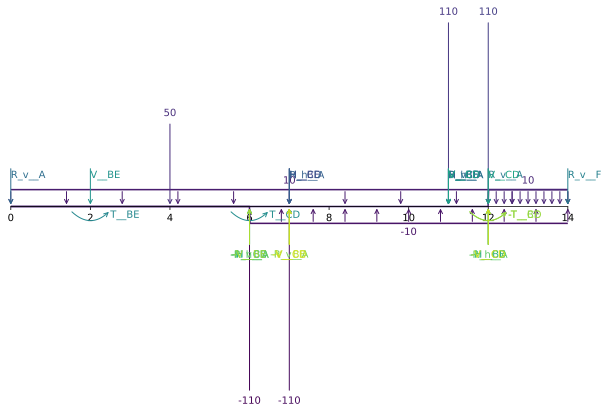

In [8]:
fig,ax = plt.subplots(figsize=(10,5))
x_plot = np.linspace(0,aa[-1],1000)
max_L = max(x_plot)
plt.xlim(0,max_L)
max_F = 0
for i in range(len(qz.args)):
    if len(qz.args[i].args[0].free_symbols) != 0:
        max_F = max(max_F,1)
    else:
        max_F = max(max_F,abs(qz.args[i].args[0]))
scale = max_L / max_F / 3
min = 0.4
indicator = False
color = iter(plt.cm.viridis(np.linspace(0, 1, len(qz.args))))
for i in range(len(qz.args)):
    c = next(color)
    if qz.args[i].args[-1].args[2] == 0:
        qz_plot = sym.lambdify(x, qz.args[i].rewrite(sym.Piecewise).simplify())
        plt.plot(x_plot,-qz_plot(x_plot) * scale,color=c)
        if qz.args[i].args[0] < 0:
            ax.annotate(sym.pretty(sym.nsimplify(qz.args[i].args[0])),xy=((max_L + qz.args[i].args[-1].args[1]) / 2 , -qz.args[i].args[0]* scale+0.1),annotation_clip=False,va='top',ha='center',color=c)
        else:
            ax.annotate(sym.pretty(sym.nsimplify(qz.args[i].args[0])),xy=((max_L + qz.args[i].args[-1].args[1]) / 2 , -qz.args[i].args[0]* scale-0.1),annotation_clip=False,va='bottom',ha='center',color=c)
        stepsize = (max_L - qz.args[i].args[-1].args[1]) / 10
        for j in range(11):
            ax.annotate("", xy=(qz.args[i].args[-1].args[1] + j*stepsize, 0), xytext=(qz.args[i].args[-1].args[1]+j*stepsize, -qz_plot(x_plot)[-1] * scale), arrowprops=dict(arrowstyle='->',color=c),annotation_clip=False)
    if qz.args[i].args[-1].args[2] == -1:
        name = sym.nsimplify(1)
        for j in range(len(qz.args[i].args[:-1])):
            name = name * qz.args[i].args[j]
        if len(name.free_symbols) != 0:
            indicator = True
            scale_or = scale
            scale = 1
        name = sym.pretty(sym.nsimplify(name))
        if isinstance(qz.args[i].args[0],sym.Float) or isinstance(qz.args[i].args[0],sym.Integer):
            ax.annotate("", xy=(qz.args[i].args[-1].args[1], 0), xytext=(qz.args[i].args[-1].args[1], -qz.args[i].args[0] * scale), arrowprops=dict(arrowstyle='->',color=c),annotation_clip=False,)
            if qz.args[i].args[0] < 0:
                ax.annotate(name,xy=(qz.args[i].args[-1].args[1] , -qz.args[i].args[0]* scale + 0.1),annotation_clip=False,va='top',ha='center',color=c)
            else:
                ax.annotate(name,xy=(qz.args[i].args[-1].args[1] , -qz.args[i].args[0]* scale - 0.1),annotation_clip=False,va='bottom',ha='center',color=c)
        else:
            ax.annotate("", xy=(qz.args[i].args[-1].args[1], 0), xytext=(qz.args[i].args[-1].args[1], -1), arrowprops=dict(arrowstyle='->',color=c),annotation_clip=False,)
            ax.annotate(name,xy=(qz.args[i].args[-1].args[1] , -1 + 0.1),annotation_clip=False,va='top',ha='left',color=c)
        if indicator:
            scale = scale_or
        indicator = False
    if qz.args[i].args[-1].args[2] == -2:
        name = sym.nsimplify(1)
        for j in range(len(qz.args[i].args[:-1])):
            name = name * qz.args[i].args[j]
        name = sym.pretty(sym.nsimplify(name))
        ax.annotate("", xy=(qz.args[i].args[-1].args[1] + 0.5, 0.1), xytext=(qz.args[i].args[-1].args[1] - 0.5, 0.1), arrowprops=dict(arrowstyle='->',color=c,connectionstyle='angle3,angleA=-45,angleB=45'),annotation_clip=False,)
        ax.annotate(name,xy=(qz.args[i].args[-1].args[1] + 0.5 , +0.1),annotation_clip=False,va='top',ha='left',color=c)
plt.tight_layout()
plt.gca().invert_yaxis()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.axes.set_aspect('equal')

In [4]:
#qx opstellen
qx = 0

#beginpunten
for i in range(len(B)):
    for j in range(len(aa)):
        if bb[i] == aa[-1]:
            if nn[i] == 2:
                qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * -sym.sin(oo[-1])
            if nn[i] == 3:
                qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[-1])
            if nn[i] == 4:
                qx += B[i] * sym.SingularityFunction(x,bb[i],0) * -sym.sin(oo[-1])
            if nn[i] == 5:
                qx += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[-1])
            break
        else:
            if bb[i] < aa[j]:
                if nn[i] == 2:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * -sym.sin(oo[j-1])
                if nn[i] == 3:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[j-1])
                if nn[i] == 4:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],0) * -sym.sin(oo[j-1])
                if nn[i] == 5:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[j-1])
                if nn[i] == 8:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-2) * EA
                break

# knikpunten
for i in range(len(B)):
    for j in range(len(aa)-1):
        if bb[i] < aa[j]:
            if nn[i] == 2:
                qx += B[i] * sym.SingularityFunction(x,aa[j],-1) * (-sym.sin(oo[j]) + sym.sin(oo[j-1]))
            if nn[i] == 3:
                qx += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.cos(oo[j]) - sym.cos(oo[j-1]))
            if nn[i] == 4:
                qx += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (-sym.sin(oo[j]) + sym.sin(oo[j-1])))
            if nn[i] == 5:
                qx += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.cos(oo[j]) - sym.cos(oo[j-1])))

display(qx)

EA*u_x^BC*SingularityFunction(x, 12.0, -2) + H^BE*SingularityFunction(x, 2, -1) - H^BE*SingularityFunction(x, 6, -1) - H^BE*SingularityFunction(x, 7, -1) + H^BE*SingularityFunction(x, 11, -1) - H^CD*SingularityFunction(x, 7, -1) + H^CD*SingularityFunction(x, 11, -1) + H^CD*SingularityFunction(x, 12, -1) - H^CD*SingularityFunction(x, 12.0, -1) + R_h^A*SingularityFunction(x, 0, -1) - R_h^A*SingularityFunction(x, 6, -1) - R_h^A*SingularityFunction(x, 7, -1) + R_h^A*SingularityFunction(x, 11, -1) + R_h^A*SingularityFunction(x, 12, -1) + R_v^A*SingularityFunction(x, 6, -1) - R_v^A*SingularityFunction(x, 7, -1) - R_v^A*SingularityFunction(x, 11, -1) + R_v^A*SingularityFunction(x, 12, -1) + V^BE*SingularityFunction(x, 6, -1) - V^BE*SingularityFunction(x, 7, -1) - V^BE*SingularityFunction(x, 11, -1) + V^BE*SingularityFunction(x, 12, -1) + V^CD*SingularityFunction(x, 6, -1) - V^CD*SingularityFunction(x, 7, -1) - V^CD*SingularityFunction(x, 11, -1) + V^CD*SingularityFunction(x, 12, -1) + 110*Sin

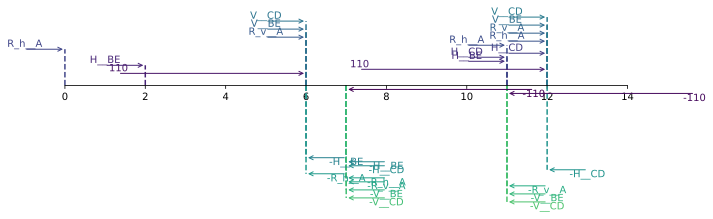

In [7]:
fig,ax = plt.subplots(figsize=(10,5))
x_plot = np.linspace(0,aa[-1],1000)
max_L = max(x_plot)
plt.xlim(0,max_L)
max_F = 0
for i in range(len(qx.args)):
    if len(qx.args[i].args[0].free_symbols) != 0:
        max_F = max(max_F,1)
    else:
        max_F = max(max_F,abs(qx.args[i].args[0]))
scale = max_L / max_F / 3
min = 0.4
indicator = False
counter = 1
color = iter(plt.cm.viridis(np.linspace(0, 1, len(qz.args))))
for i in range(len(qx.args)):
    c=next(color)
    if qx.args[i].args[-1].args[2] == 0:
        qx_plot = sym.lambdify(x, qx.args[i].rewrite(sym.Piecewise).simplify())
        plt.plot(x_plot,-qx_plot(x_plot) * scale,color=c)
        if qx.args[i].args[0] < 0:
            ax.annotate(sym.pretty(sym.nsimplify(qx.args[i].args[0])),xy=((max_L+qx.args[i].args[-1].args[1])/2 , -qx.args[i].args[0]* scale+0.1),annotation_clip=False,va='top',ha='left',color=c)
        else:
            ax.annotate(sym.pretty(sym.nsimplify(qx.args[i].args[0])),xy=((max_L+qx.args[i].args[-1].args[1])/2 , -qx.args[i].args[0]* scale-0.1),annotation_clip=False,va='bottom',ha='left',color=c)
        stepsize = (max_L - qx.args[i].args[-1].args[1]) / 10
        for j in range(10):
            ax.annotate("", xy=(qx.args[i].args[-1].args[1] + j*stepsize, -qx.args[i].args[0]* scale/2), xytext=(qx.args[i].args[-1].args[1] + j*stepsize + stepsize*0.9, -qx.args[i].args[0]* scale/2), arrowprops=dict(arrowstyle='->',color=c),annotation_clip=False)
    if qx.args[i].args[-1].args[2] == -1:
        name = sym.nsimplify(1)
        for j in range(len(qx.args[i].args[:-1])):
            name = name * qx.args[i].args[j]
        if len(name.free_symbols) != 0:
            indicator = True
            scale_or = scale
            scale = 1
        name = sym.pretty(sym.nsimplify(name))
        if isinstance(qx.args[i].args[0],sym.Float) or isinstance(qx.args[i].args[0],sym.Integer):
            if qx.args[i].args[0] < 0:
                ax.annotate(name,xy=(qx.args[i].args[-1].args[1] -qx.args[i].args[0]* scale , +0.1*counter ),annotation_clip=False,va='top',ha='center',color=c)
                ax.annotate("", xy=(qx.args[i].args[-1].args[1], +0.1*counter), xytext=(qx.args[i].args[-1].args[1] -qx.args[i].args[0] * scale, +0.1*counter), arrowprops=dict(arrowstyle='->',color=c),annotation_clip=False,)
                plt.plot([qx.args[i].args[-1].args[1],qx.args[i].args[-1].args[1]],[0,+0.1*counter],linestyle='--',color=c)
            else:
                ax.annotate(name,xy=(qx.args[i].args[-1].args[1] -qx.args[i].args[0]* scale , -0.1*counter ),annotation_clip=False,va='bottom',ha='center',color=c)
                ax.annotate("", xy=(qx.args[i].args[-1].args[1], -0.1*counter), xytext=(qx.args[i].args[-1].args[1] -qx.args[i].args[0] * scale, -0.1*counter), arrowprops=dict(arrowstyle='->',color=c),annotation_clip=False,)
                plt.plot([qx.args[i].args[-1].args[1],qx.args[i].args[-1].args[1]],[0,-0.1*counter],linestyle='--',color=c)
        else:
            ax.annotate("", xy=(qx.args[i].args[-1].args[1], -0.1*counter), xytext=(qx.args[i].args[-1].args[1] - 1, -0.1*counter), arrowprops=dict(arrowstyle='->',color=c),annotation_clip=False,)
            ax.annotate(name,xy=(qx.args[i].args[-1].args[1] -1 ,  - 0.1*counter),annotation_clip=False,va='bottom',ha='center',color=c)
            plt.plot([qx.args[i].args[-1].args[1],qx.args[i].args[-1].args[1]],[0,-0.1*counter],linestyle='--',color=c)
        if indicator:
            scale = scale_or
        indicator = False
        counter += 1
plt.tight_layout()
plt.gca().invert_yaxis()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_yaxis().set_ticks([])
ax.axes.set_aspect('equal')

In [6]:
V = -sym.integrate(qz.expand(), x) + CV
M = sym.integrate(V, x) + CM
kappa = M / EI
phi = sym.integrate(kappa, x) + Cphi
uz = -sym.integrate(phi, x) + Cuz

N = -sym.integrate(qx.expand(), x) + CN
epsilon = N / EA
ux = sym.integrate(epsilon, x) + Cux

uvz = uz.subs(x,0) * sym.cos(o0)
uvx = -ux.subs(x,0) * sym.sin(o0)
for i in range(len(oo)):
    uvz += ((uz - uz.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (uz - uz.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.cos(oo[i])
    uvx += -((ux - ux.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (ux - ux.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.sin(oo[i])
uv = uvz + uvx

uhz = uz.subs(x,0) * sym.sin(o0)
uhx = ux.subs(x,0) * sym.cos(o0)
for i in range(len(oo)):
    uhz += ((uz - uz.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (uz - uz.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.sin(oo[i])
    uhx += ((ux - ux.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (ux - ux.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.cos(oo[i])
uh = uhz + uhx

display(sym.symbols('{N}='), N)
display(sym.symbols('{V}='), V)
display(sym.symbols('{M}='), M)
display(sym.symbols('{u_x}='), ux)
display(sym.symbols('{\phi}='), phi)
display(sym.symbols('{u_z}='), uz)
display(sym.symbols('{u_v}='), uv)
display(sym.symbols('{u_h}='), uh)

<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
C:\Users\tomvanwoudenbe\AppData\Local\Temp\ipykernel_32016\431301527.py:29: SyntaxWarning: invalid escape sequence '\p'
  display(sym.symbols('{\phi}='), phi)
C:\Users\tomvanwoudenbe\AppData\Local\Temp\ipykernel_32016\431301527.py:29: SyntaxWarning: invalid escape sequence '\p'
  display(sym.symbols('{\phi}='), phi)


KeyboardInterrupt: 

In [6]:
# 3 reactiekrachten + 6 knoopkrachten + 3 vervormingssprongen + 6 integratieconstanten = 18 voorwaarden
Eq1 = sym.Eq(N.subs(x,a0-dx),0)
Eq2 = sym.Eq(N.subs(x,a5+dx),0)
Eq3 = sym.Eq(N.subs(x,a6+dx),0)
Eq4 = sym.Eq(V.subs(x,0-dx),0)
Eq5 = sym.Eq(V.subs(x,a5+dx),0)
Eq6 = sym.Eq(V.subs(x,a6+dx),0)
Eq7 = sym.Eq(M.subs(x,a0-dx),0)
Eq8 = sym.Eq(M.subs(x,a5+dx),0)
Eq9 = sym.Eq(M.subs(x,a6+dx),0)
Eq10 = sym.Eq(phi.subs(x,a5+dx)-phi.subs(x,a1),0)
Eq11 = sym.Eq(phi.subs(x,s1+dx)-phi.subs(x,a2),0)
Eq12 = sym.Eq(uv.subs(x,0),0)
Eq13 = sym.Eq(uv.subs(x,a5)-uv.subs(x,a1),0)
Eq14 = sym.Eq(uv.subs(x,s1)-uv.subs(x,a2),0)
Eq15 = sym.Eq(uv.subs(x,a6),0)
Eq16 = sym.Eq(uh.subs(x,0),0)
Eq17 = sym.Eq(uh.subs(x,a5)-uh.subs(x,a1),0)
Eq18 = sym.Eq(uh.subs(x,s1)-uh.subs(x,a2),0)

In [7]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8,Eq9,Eq10,Eq11,Eq12,Eq13,Eq14,Eq15,Eq16,Eq17,Eq18),(RvA,RhA,RvF,VBE,HBE,TBE,VCD,HCD,TCD,phiBC,uzBC,uxBC,CN,CV,CM,Cphi,Cuz,Cux))
display(sol)

{C_M: 0.0,
 C_N: 0.0,
 C_V: 0.0,
 C_phi: (-4.40975360000001e+45*EA**2 - 3.08877312e+46*EA*EI - 3.2587776e+45*EI**2)/(2.79552e+43*EA**2*EI + 1.062144e+44*EA*EI**2 + 1.10592e+43*EI**3),
 C_ux: 0.0,
 C_uz: 0.0,
 H^BE: 5.696e+31*EA/(4.16e+29*EA + 1.536e+30*EI),
 H^CD: 0.0,
 R_h^A: 0.0,
 R_v^A: -65.0000000000000,
 R_v^F: -65.0000000000000,
 T^BE: (4.465664e+33*EA**2 + 8.133888e+33*EA*EI + 8.20223999999999e+32*EI**2)/(3.4944e+31*EA**2 + 1.32768e+32*EA*EI + 1.3824e+31*EI**2),
 T^CD: 110.000000000000,
 V^BE: -3.69482222595252e+15*EA/(8.96e+29*EA + 9.6e+28*EI),
 V^CD: -45.0000000000000,
 phi^BC: (-1.7088e+31*EA - 2.73408e+32*EI)/(4.16e+29*EA*EI + 1.536e+30*EI**2),
 u_x^BC: (2.848e+58*EA + 1.09139364212751e+43*EI)/(5.2e+55*EA**2 + 1.92e+56*EA*EI),
 u_z^BC: (-9.14720432611493e+29*EA - 9.82168933355715e+28*EI)/(1.792e+41*EA*EI + 1.92e+40*EI**2)}

In [8]:
#display(sym.simplify(uz.subs(sol).rewrite(sym.Piecewise)))
ea = 10**3
ei = 3*10**3

display(f'{RvA} = {RvA.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{RhA} = {RhA.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{RvF} = {RvF.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')

display(f'{VBE} = {VBE.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{HBE} = {HBE.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{TBE} = {TBE.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{VCD} = {VCD.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{HCD} = {HCD.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{TCD} = {TCD.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')

display(f'{phiBC} = {phiBC.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{uzBC} = {uzBC.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{uxBC} = {uxBC.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')

display(f'{CN} = {CN.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{CV} = {CV.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{CM} = {CM.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{Cphi} = {Cphi.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{Cux} = {Cux.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{Cuz} = {Cuz.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')

'R_v^A = -65.00'

'R_h^A = 0.00'

'R_v^F = -65.00'

'V^BE = -0.00'

'H^BE = 11.34'

'T^BE = 65.00'

'V^CD = -45.00'

'H^CD = 0.00'

'T^CD = 110.00'

'phi^BC = -0.0556'

'u_z^BC = -0.0000'

'u_x^BC = 0.0454'

'C_N = 0.00'

'C_V = 0.00'

'C_M = 0.00'

'C_phi = -0.0944'

'C_ux = 0.00'

'C_uz = 0.00'

In [9]:
vBE, hBE = sym.symbols('v^BE h^BE')
vv = [vBE]
hh = [hBE]
v = 0
h = 0
for i in range(len(oo)):
    v += -(sym.SingularityFunction(x,aa[i],1) - sym.SingularityFunction(x,aa[i+1],1)) * sym.sin(oo[i])
    h += (sym.SingularityFunction(x,aa[i],1) - sym.SingularityFunction(x,aa[i+1],1)) * sym.cos(oo[i])
for i in range(len(ss)):
    v += vv[i] * sym.SingularityFunction(x,ss[i],0)
    h += hh[i] * sym.SingularityFunction(x,ss[i],0)

# 1 x 2 sprongen = 2 onbekenden
Eq1 = sym.Eq(v.subs(x,a2),v.subs(x,s1))
Eq2 = sym.Eq(h.subs(x,a2),h.subs(x,s1))

sol2 = sym.solve((Eq1,Eq2),(vBE, hBE))
display(sol2)

{h^BE: 4.00000000000000, v^BE: 0.0}

In [10]:
L = aa[-1]
x_np = np.linspace(0-dx,L+dx,10000)
ab = aa
ab.extend(bb)
ab.sort()
ab = list(dict.fromkeys(ab))

-11.3375796178344*SingularityFunction(x, 2, 0) + 11.3375796178344*SingularityFunction(x, 6, 0) + 11.3375796178344*SingularityFunction(x, 7, 0) - 11.3375796178344*SingularityFunction(x, 11, 0) + 3.12062688002747e-15*SingularityFunction(x, 12, 0) - 45.3503184713376*SingularityFunction(x, 12.0, -1)

'N(0) = 0 [kN]'

'N(2) = -11.3375796178344 [kN]'

'N(4) = -11.3375796178344 [kN]'

'N(6) = 3.12062688002747E-15 [kN]'

'N(7) = 11.3375796178344 [kN]'

'N(11) = -3.12062688002747E-15 [kN]'

'N(12) = 0 [kN]'

'N(12.000000000000004) = -oo [kN]'

'N(14) = 0 [kN]'

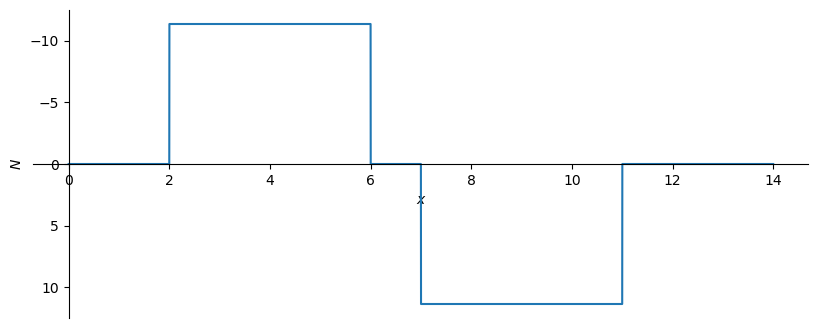

In [11]:
N_np = sym.lambdify(x, N.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
display(N.subs(sol).subs(EI,ei).subs(EA,ea))

for i in range(len(ab)):
    display(f'N({ab[i]}) = {N.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea)} [kN]')

plt.figure(figsize=(10,4))
plt.plot(x_np,N_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$N$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

65.0*SingularityFunction(x, 0, 0) - 10*SingularityFunction(x, 0, 1) - 65.0021231422505*SingularityFunction(x, 2, -1) + 3.12062688002747e-15*SingularityFunction(x, 2, 0) - 50*SingularityFunction(x, 4, 0) - 110.0*SingularityFunction(x, 6, -1) + 56.3375796178344*SingularityFunction(x, 6, 0) + 10*SingularityFunction(x, 6, 1) - 11.3375796178344*SingularityFunction(x, 7, 0) - 11.3375796178344*SingularityFunction(x, 11, 0) + 65.0021231422505*SingularityFunction(x, 12, -1) + 11.3375796178344*SingularityFunction(x, 12, 0) + 5.10714152288094e-12*SingularityFunction(x, 12.0, -3) + 333.324840764331*SingularityFunction(x, 12.0, -2) + 110.0*SingularityFunction(x, 12.0, -1) - 45.0*SingularityFunction(x, 12.0, 0) - 10*SingularityFunction(x, 12.0, 1) + 65.0*SingularityFunction(x, 14, 0)

'V(0) = 65.0000000000000 [kN]'

'V(2) = 45.0000000000000 [kN]'

'V(4) = -25.0000000000000 [kN]'

'V(6) = 11.3375796178344 [kN]'

'V(7) = -3.12062688002747E-15 [kN]'

'V(11) = -11.3375796178344 [kN]'

'V(12) = 0 [kN]'

'V(12.000000000000004) = -45.0000000000000 [kN]'

'V(14) = 0 [kN]'

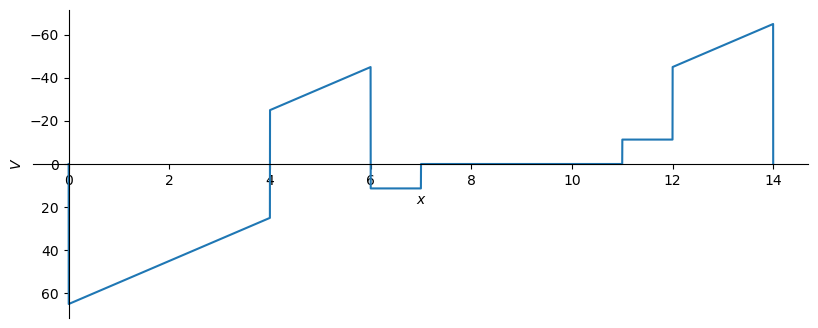

In [12]:
V_np = sym.lambdify(x, V.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
display(V.subs(sol).subs(EI,ei).subs(EA,ea))

for i in range(len(ab)):
    display(f'V({ab[i]}) = {V.subs(x,ab[i]+dx).subs(sol).subs(EI,ei).subs(EA,ea)} [kN]')

plt.figure(figsize=(10,4))
plt.plot(x_np,V_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$V$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

'M(0) = 0.0 [kNm]'

'M(2) = 44.9978768577495 [kNm]'

'M(4) = 114.997876857749 [kNm]'

'M(6) = -65.0021231422505 [kNm]'

'M(7) = -53.6645435244161 [kNm]'

'M(11) = -53.6645435244161 [kNm]'

'M(12) = 2.84217094304040E-14 [kNm]'

'M(12.000000000000004) = oo [kNm]'

'M(14) = 5.68434188608080E-14 [kNm]'

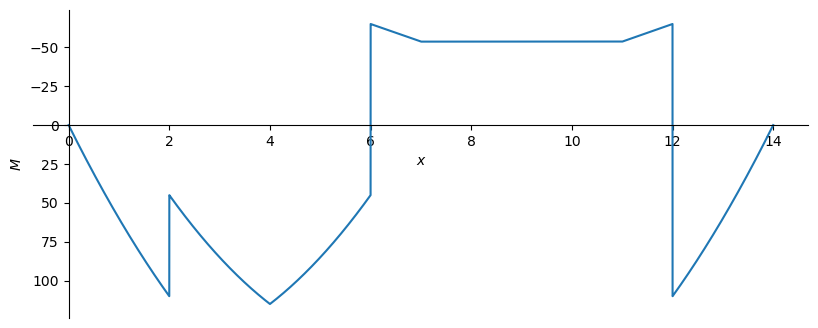

In [13]:
M_np = sym.lambdify(x, M.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))

for i in range(len(ab)):
    display(f'M({ab[i]}) = {M.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea)} [kNm]')

plt.figure(figsize=(10,4))
plt.plot(x_np,M_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$M$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

'uv(0.0) = 0.0000 [m]'

'uv(2.0) = 0.1622 [m]'

'uv(4.0) = 0.2256 [m]'

'uv(6.0) = 0.1622 [m]'

'uv(7.0) = 0.1622 [m]'

'uv(11.0) = 0.1622 [m]'

'uv(12.0) = 0.1622 [m]'

'uv(12.0) = 0.1622 [m]'

'uv(14.0) = 0.0000 [m]'

'uh(0.0) = 0.0000 [m]'

'uh(2.0) = 0.0000 [m]'

'uh(4.0) = -0.0227 [m]'

'uh(6.0) = -0.0454 [m]'

'uh(7.0) = -0.0000 [m]'

'uh(11.0) = -0.0454 [m]'

'uh(12.0) = -0.0000 [m]'

'uh(12.0) = -0.0454 [m]'

'uh(14.0) = -0.0454 [m]'

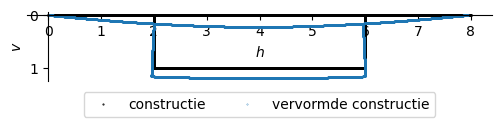

In [14]:
v_np = sym.lambdify(x, v.subs(sol2).rewrite(sym.Piecewise))
h_np = sym.lambdify(x, h.subs(sol2).rewrite(sym.Piecewise))

uv_np = sym.lambdify(x, uv.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
uh_np = sym.lambdify(x, uh.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))

#display(uv.subs(sol))
for i in range(len(ab)):
    display(f'uv({ab[i]:.1f}) = {uv.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea):.4f} [m]')

for i in range(len(ab)):
    display(f'uh({ab[i]:.1f}) = {uh.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea):.4f} [m]')

plt.figure(figsize=(6,6))
plt.plot(h_np(x_np),v_np(x_np), marker='.',markersize=1, linewidth=0, color='black', label='constructie')
plt.plot((h_np(x_np)+uh_np(x_np)),(v_np(x_np)+uv_np(x_np)), marker='.',markersize=0.5, linewidth=0, label='vervormde constructie')
plt.xlabel('$h$')
plt.ylabel('$v$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()
plt.axis('scaled')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=False, ncol=3);